<a href="https://colab.research.google.com/github/VPonomarev42/LearningRep/blob/main/product/rfm_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача

Проведение ***RFM ***анализа пользователей. В каждом подсегменте поделим пользователей на 4 класса. Отсчитаем количество дней, прошедших с момента последней покупки, с максимальной даты покупки в датасете.

## Вопросы

- Какое максимальное кол-во покупок было совершено одним пользователем?
- Какая верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М? (Другими словами: пользователи, у которых сумма покупок от 0 до Х попадают в 4 класс в подсегменте М)
- Какая нижняя граница у количества покупок у пользователей с классом 1 в подсегменте F?
- Какая верхняя граница у количества покупок у пользователей с классом 2 в подсегменте R?
- Сколько пользователей попало в сегмент 111?
- Сколько пользователей попало в сегмент 311?
- В каком RFM-сегменте самое большое кол-во пользователей?
- В каком RFM-сегменте самое маленькое кол-во пользователей?
- Какое количество пользователей попало в самый малочисленный сегмент?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(10,5)}, style='whitegrid')

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/413464/RFM_ht_data.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,InvoiceNo,CustomerCode,InvoiceDate,Amount
0,C0011810010001,19067290,2020-09-01,1716.00
1,C0011810010017,13233933,2020-09-01,1489.74
2,C0011810010020,99057968,2020-09-01,151.47
3,C0011810010021,80007276,2020-09-01,146.72
4,C0011810010024,13164076,2020-09-01,104.00


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332730 entries, 0 to 332729
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          332730 non-null  object        
 1   CustomerCode       332730 non-null  object        
 2   InvoiceDate        332730 non-null  datetime64[ns]
 3   Amount             332730 non-null  float64       
 4   last_invoice_days  332730 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 12.7+ MB


In [81]:
df.CustomerCode = df.CustomerCode.apply(lambda x: str(x))

Не можем привести колонку **CustomerCode** к целочисленному типа, т.к. содержатся ячейки комбинированного типа.

In [82]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332730 entries, 0 to 332729
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          332730 non-null  object        
 1   CustomerCode       332730 non-null  object        
 2   InvoiceDate        332730 non-null  datetime64[ns]
 3   Amount             332730 non-null  float64       
 4   last_invoice_days  332730 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 12.7+ MB


In [84]:
df.shape

(332730, 5)

In [85]:
df.isnull().sum()

InvoiceNo            0
CustomerCode         0
InvoiceDate          0
Amount               0
last_invoice_days    0
dtype: int64

## 0. Отсчитаем количество дней, прошедших с момента последней покупки

In [86]:
df.InvoiceDate.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  332730
unique                     30
top       2020-09-30 00:00:00
freq                    19781
first     2020-09-01 00:00:00
last      2020-09-30 00:00:00
Name: InvoiceDate, dtype: object

In [87]:
last_invoice_date = df.InvoiceDate.max()
last_invoice_date

Timestamp('2020-09-30 00:00:00')

## 1. Какое максимальное количество покупок совершил один пользователь

In [88]:
df.query('Amount > 0').groupby('CustomerCode').InvoiceNo.count().sort_values(ascending=False)

CustomerCode
19057820    204
13215452    113
13032521    106
19080880     99
99003061     90
           ... 
18053013      1
18053019      1
18053055      1
18053072      1
02213019      1
Name: InvoiceNo, Length: 123731, dtype: int64

## 2. Какая верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М? 

In [89]:
rfmTable = df.groupby('CustomerCode').agg({'InvoiceDate': lambda x: (last_invoice_date - x.max()).days, 
                                'InvoiceNo': lambda x: len(x), 
                                'Amount': lambda x: sum(x)})
rfmTable = rfmTable.rename(columns={'InvoiceDate': 'Recency',
                                    'InvoiceNo': 'Frequency',
                                    'Amount':'Monetary'})
rfmTable.head()

,Recency,Frequency,Monetary
CustomerCode,,,
02213019,19,1,1609.20
02213042,22,3,9685.48
02213071,29,1,415.00
02213088,23,1,305.00
02213092,25,1,1412.88


In [90]:
rfmTable.describe()

,Recency,Frequency,Monetary
count,123733.000000,123733.000000,123733.000000
mean,9.797742,2.689097,3331.870758
std,8.560802,2.894494,6131.418681
min,0.000000,1.000000,-80.000000
25%,2.000000,1.000000,765.000000
50%,8.000000,2.000000,1834.480000
75%,16.000000,3.000000,4008.840000
max,29.000000,204.000000,711487.710000


In [91]:
quntiles = rfmTable.quantile([0.25,0.5,0.75])
quntiles

,Recency,Frequency,Monetary
0.25,2.0,1.0,765.00
0.50,8.0,2.0,1834.48
0.75,16.0,3.0,4008.84


In [92]:
def Rclassifier(value, parameter_name, quntiles_table):
  if value <= quntiles_table[parameter_name][0.25]: return 1
  if value <= quntiles_table[parameter_name][0.5]: return 2
  if value <= quntiles_table[parameter_name][0.75]: return 3
  return 4
def FMclassifier(value, parameter_name, quntiles_table):
  if value <= quntiles_table[parameter_name][0.25]: return 4
  if value <= quntiles_table[parameter_name][0.5]: return 3
  if value <= quntiles_table[parameter_name][0.75]: return 2
  return 1

In [102]:
rfmTable['R'] = rfmTable['Recency'].apply(Rclassifier, args=('Recency', quntiles))
rfmTable['F'] = rfmTable['Frequency'].apply(FMclassifier, args=('Frequency', quntiles))
rfmTable['M'] = rfmTable['Monetary'].apply(FMclassifier, args=('Monetary', quntiles))
rfmTable['RFM'] = rfmTable['R'].map(str) + rfmTable['F'].map(str) + rfmTable['M'].map(str)


In [94]:
rfmTable.head()

,Recency,Frequency,Monetary,R,F,M,RFM
CustomerCode,,,,,,,
02213019,19,1,1609.20,4,1,2,412
02213042,22,3,9685.48,4,3,4,434
02213071,29,1,415.00,4,1,1,411
02213088,23,1,305.00,4,1,1,411
02213092,25,1,1412.88,4,1,2,412


In [108]:
 print(f"Верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М = {quntiles['Monetary'][0.25]}")

Верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М = 765.0


In [111]:
 print(f"Нижняя граница у количества покупок у пользователей с классом 1 в подсегменте F = {rfmTable[rfmTable.F == 1].Frequency.min()}")

Нижняя граница у количества покупок у пользователей с классом 1 в подсегменте F = 4


In [113]:
 print(f"Максимальное количество дней, которое должно пройти с момента последней покупки для того, чтобы пользователь попал в класс 2 в подсегменте R = {rfmTable[rfmTable.R == 2].Recency.max()}") 

Максимальное количество дней, которое должно пройти с момента последней покупки для того, чтобы пользователь попал в класс 2 в подсегменте R = 8


In [116]:
 print(f"В сегмент 111 попало {rfmTable[rfmTable.RFM == '111'].RFM.count()} пользователей")

В сегмент 111 попало 9705 пользователей


In [117]:
 print(f"В сегмент 311 попало {rfmTable[rfmTable.RFM == '311'].RFM.count()} пользователей")

В сегмент 311 попало 1609 пользователей


In [118]:
print(f"В RFM-сегменте {rfmTable.RFM.value_counts().idxmax()} самое большое кол-во пользователей")

В RFM-сегменте 444 самое большое кол-во пользователей


In [121]:
print(f"В RFM-сегменте {rfmTable.RFM.value_counts().idxmin()} самое маленькое кол-во пользователей. Их количество = {rfmTable.RFM.value_counts().min()}")

В RFM-сегменте 414 самое маленькое кол-во пользователей. Их количество = 2


In [119]:
pd.crosstab(rfmTable['R'], rfmTable['F'])

F,1,2,3,4
R,,,,
1,14433,4671,5795,6074
2,9634,5889,8633,10399
3,3091,3748,7734,13263
4,542,1311,5415,23101


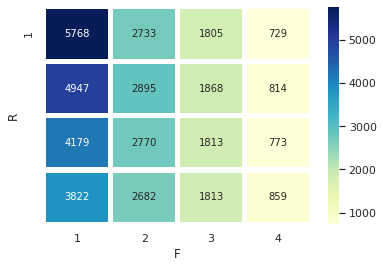

In [122]:
rfm_table_pivot = rfmTable.pivot_table(
                        index='R', 
                        columns='F', 
                        values='Monetary', 
                        aggfunc=np.median).applymap(int)
sns.heatmap(rfm_table_pivot, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=4.15, annot_kws={"size": 10},yticklabels=4);